In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
#loading PCA dataset from saved data folder
df = pd.read_pickle('saved_data/df_ready.pkl')

In [3]:
#splitting the data
x = df.drop(columns='num')
y = df['num']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [4]:
#training models
models = {
    'Logistic_Regression': LogisticRegression(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}
for name, model in models.items():
    model.fit(x_train, y_train)

In [5]:
#saving evaluation as a file to compare with optimized models later
text = ""
for name, model in models.items():
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    metrics = classification_report(y_test, y_pred, target_names=["class 0", "class 1"])
    text += f"{name.replace('_', ' ')}:\n"
    text += metrics
    text += f"AUC Score: {auc:.4f}\n\n"
with open("results/before_tuning_evaluation.txt", "w") as f:
    f.write(text)

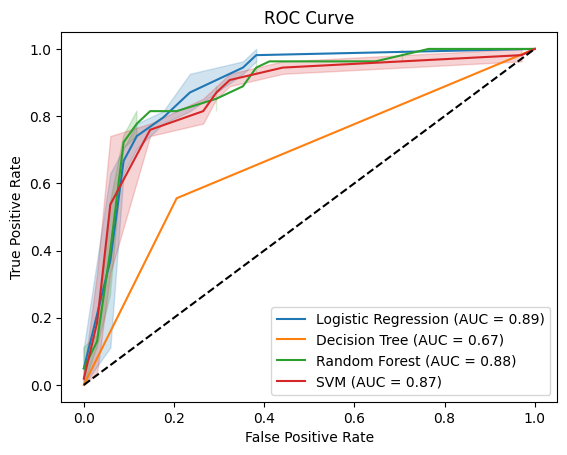

In [6]:
#plotting ROC curves
for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    sns.lineplot(x=fpr, y=tpr, label=f'{name.replace('_', ' ')} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

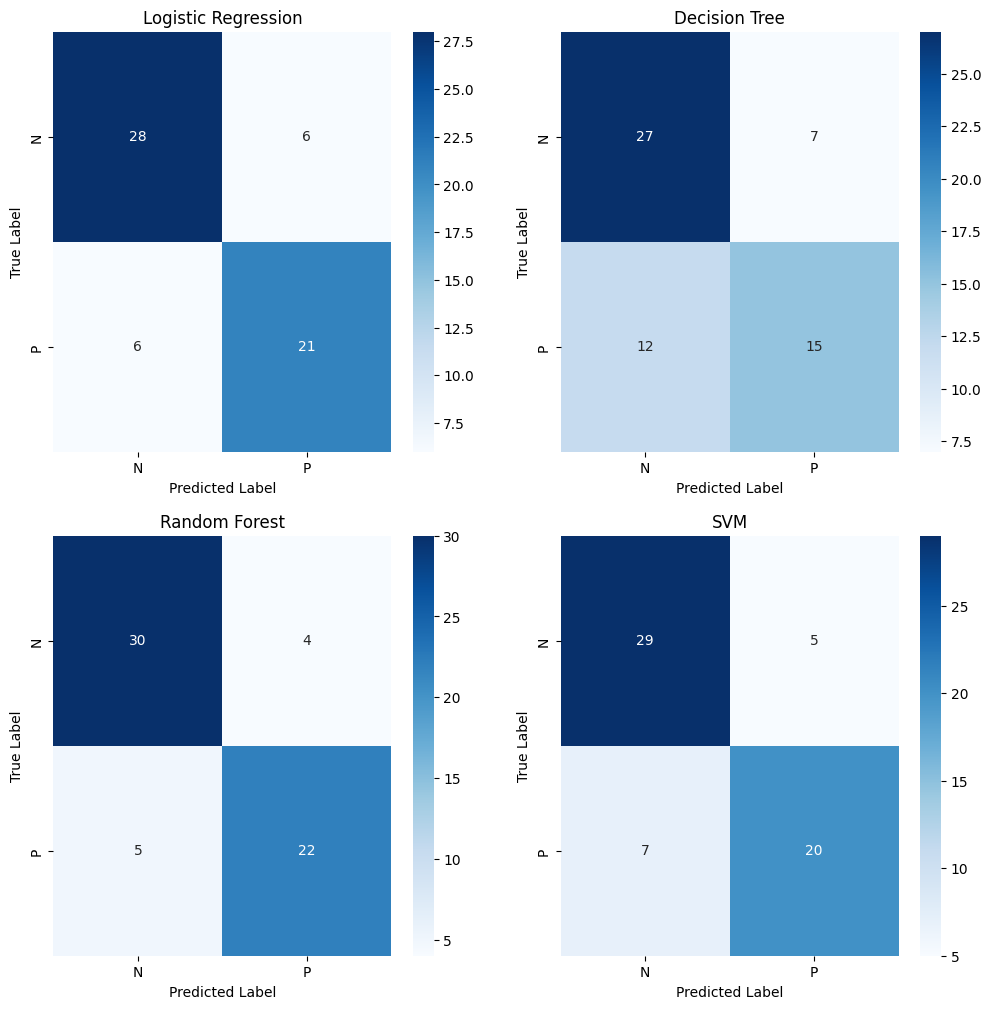

In [7]:
#confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True,cmap='Blues',xticklabels=['N', 'P'],yticklabels=['N', 'P'],ax=ax)
    ax.set_title(f'{name.replace('_', ' ')}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
plt.show()